## Import libraries

In [1]:
import numpy as np
import pandas as pd
import sys, time
from keras.models import Sequential
from keras.layers import GRU, Activation, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
mod = sys.modules[__name__]

## Bring RNN Classifier models

In [2]:
tier = 'PLATINUM'
for tl in range(2, 46):
    RNN = load_model("./RNN Classifiers/{0}/{0}{1}".format(tier, tl))
    setattr(mod, "RNN{}".format(tl), RNN)
    print(eval("RNN{}".format(tl)).summary()) # check model state

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 44)                9240      
_________________________________________________________________
activation (Activation)      (None, 44)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 44)                9240      
_________________________________________________________________
activation_1 (Activation)    (None, 44)                0         
___________________________

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_11 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_12 (Activation)   (None, 44)                0         
_______________________

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_22 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_23 (Activation)   (None, 44)                0         
_______________________

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_33 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_33 (Activation)   (None, 44)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 90        
Total params: 9,330
Trainable params: 9,330
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_34 (GRU)                 (None, 44)                9240      
_________________________________________________________________
activation_34 (Activation)   (None, 44)                0         
_______________________

## Test

0


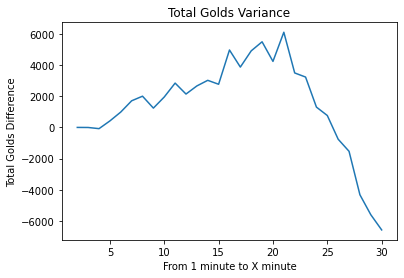

In [4]:
start, end = 2, 50
import matplotlib.pyplot as plt
data = pd.read_pickle("./RNN Dataset/{0}/Test/Data/{0}{1}.pkl".format(tier, 1))
target = pd.read_pickle("./RNN Dataset/{0}/Test/Target/{0}{1}.pkl".format(tier, 1))
for i in range(data.shape[0]):
    endTime = data[i].shape[0]
    if endTime == 30: # 경기 시간이 30분인 매치 탐색
        index = i
        sample = data[i]
        break
print(target[index])
totalGolds = []
for tl in range(start, endTime+1):
    totalGolds.append(sample[tl-1][0])
x_axis = list(range(start, endTime+1))
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, totalGolds)
plt.xlabel("From 1 minute to X minute")
plt.ylabel("Total Golds Difference")
plt.title("Total Golds Variance")
plt.show()

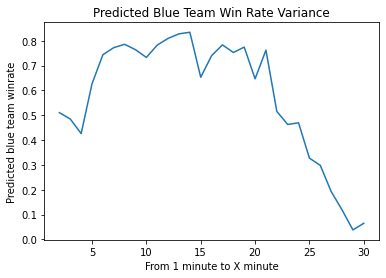

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_pred = []
for tl in range(start, endTime+1):
    input_data = sample[:tl, :]
    input_data = scaler.fit_transform(input_data)
    timestamps, input_dim = input_data.shape
    input_data = input_data.reshape(1, timestamps, input_dim)
    pred = eval("RNN{}".format(tl)).predict(input_data)
    y_pred.append(pred[0][0])
x_axis = list(range(start, endTime+1)) # 2 ~ 30, 29개. sample의 shape은 (30, 22)
fig = plt.figure()
fig.patch.set_facecolor("white")
plt.plot(x_axis, y_pred)
plt.xlabel("From 1 minute to X minute")
plt.ylabel("Predicted blue team winrate")
plt.title("Predicted Blue Team Win Rate Variance")
plt.show()

In [8]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("strategygg-f3884-firebase-adminsdk-l4cvw-481c873e10.json")
firebase_admin.initialize_app(cred,{
    "databaseURL" : "https://strategygg-f3884.firebaseio.com/"
})
tf_after = [
            "first_blood", "first_dragon", "first_tower", "first_inhibitor", "first_baron",
            "kills", "kills_total_minion", "kills_total_jungle_minion",
            "kills_mid_towers", "kills_top_towers", "kills_bot_towers",
            "total_dragons", "kills_inhibitors", "total_barons",
            "total_level", "place_wards", "kills_wards"
        ]

In [11]:
db_path = "Statistics/{}/{}/{}"
ref = db.reference(db_path.format('PLATINUM', 24, 'blue'))
statistics = ref.get()

{'assists': 2.084,
 'avg_level': 0.26,
 'current_gold': 2215.008,
 'deaths': 0.963,
 'first_baron': 0.057,
 'first_blood': 0.0,
 'first_dragon': 0.0,
 'first_inhibitor': 0.035,
 'first_tower': 0.0,
 'kills': 0.97,
 'kills_bot_towers': 0.057,
 'kills_inhibitors': 0.051,
 'kills_mid_towers': 0.127,
 'kills_top_towers': 0.042,
 'kills_total_jungle_minion': 4.505,
 'kills_total_minion': 8.484,
 'kills_total_towers': 0.226,
 'kills_wards': 0.859,
 'place_wards': 2.292,
 'rift_heralds': 0.0,
 'total_barons': 0.057,
 'total_dragons': 0.104,
 'total_gold': 1032.925,
 'total_level': 1.224}

In [12]:
statisticsData = list(statistics.values())
statisticsData

[2.084,
 0.26,
 2215.008,
 0.963,
 0.057,
 0.0,
 0.0,
 0.035,
 0.0,
 0.97,
 0.057,
 0.051,
 0.127,
 0.042,
 4.505,
 8.484,
 0.226,
 0.859,
 2.292,
 0.0,
 0.057,
 0.104,
 1032.925,
 1.224]

In [13]:
xlabels = list(statistics.keys())
xlabels

['assists',
 'avg_level',
 'current_gold',
 'deaths',
 'first_baron',
 'first_blood',
 'first_dragon',
 'first_inhibitor',
 'first_tower',
 'kills',
 'kills_bot_towers',
 'kills_inhibitors',
 'kills_mid_towers',
 'kills_top_towers',
 'kills_total_jungle_minion',
 'kills_total_minion',
 'kills_total_towers',
 'kills_wards',
 'place_wards',
 'rift_heralds',
 'total_barons',
 'total_dragons',
 'total_gold',
 'total_level']

In [16]:
columns = [i for i in range(1, 31)]
firstPred = [0.5]
win_rates = firstPred+y_pred
win_rates = list(map(lambda x:100*x, win_rates))
y_pred_df = pd.DataFrame([win_rates], columns=columns)
y_pred_df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,50.0,51.053876,48.497939,42.631504,62.714463,74.399132,77.253598,78.591168,76.422876,73.300731,...,76.244372,51.576173,46.301118,46.965188,32.7301,29.821163,19.284795,11.89776,3.819258,6.494763


In [17]:
diff_columns = [
        "total_gold", # 0 numeric
        "current_gold", # 1 numeric
        "total_level", # 2 numeric
        "avg_level", # 3 numeric
        "kills_total_minion", # 4 numeric
        "kills_total_jungle_minion", # 5 numeric
        "first_blood", # 6 binary
        "kills", # 7
        "deaths", # 8
        "assists", # 9
        "place_wards", # 10
        "kills_wards", # 11
        "first_tower", # 12 binary
        "first_inhibitor", # 13 binary
        # "first_tower_lane", # 14 category, delete
        "kills_total_towers", # 15
        "kills_mid_towers", # 16
        "kills_top_towers", # 17
        "kills_bot_towers", # 18
        "kills_inhibitors", # 19
        "first_dragon", # 20
        # "dragon_type", # 21, delete 해서 총 22개 남는다.
        "total_dragons", # 22
        "rift_heralds", # 23
        "first_baron",
        "total_barons"
    ]
def getfboutline(win_rates):
    # 우선 매 분마다 win_rates의 변화도를 구한다
    length = len(win_rates)
    differentials = []
    for idx in range(length-1):
        differentials.append(win_rates[idx+1]-win_rates[idx])
    totalFeedbacks, alpha = divmod(length, 5)
    if totalFeedbacks == 0:
        feedback_num = [0, 0]
        feedback_points = 0
    else: # itvidx: interval index
        pFeedbackNum, nFeedbackNum = 0, 0
        feedback_points = {} # key : point(timestamp)
        maxDifferentials = [] # 각 구간의 최고 변화율을 담는다.
        for itvidx in range(totalFeedbacks):
            if itvidx == 0:
                lower, upper = 0, 4
            else:
                lower, upper = 5*itvidx-1, 5*(itvidx+1)-1
            targetInterval = differentials[lower:upper]
            absInterval = list(map(abs, targetInterval))
            maxDifferential = max(absInterval)
            maxDifferentials.append(maxDifferential)
            point = absInterval.index(maxDifferential)
            delta = round(targetInterval[point], 1)
            if delta > 0: # 긍정적 피드백
                feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                }
                pFeedbackNum += 1
            elif delta < 0: # 부정적 피드백
                feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                }
                nFeedbackNum += 1
        if alpha != 0: # 5분씩 나눈 구간 후 마지막 구간
            lower = 5*(totalFeedbacks)-1
            targetInterval = differentials[lower:]
            absInterval = list(map(abs, targetInterval))
            maxDifferential = max(absInterval)
            if maxDifferential >= np.median(maxDifferentials):
                point = absInterval.index(maxDifferential)
                delta = round(targetInterval[point], 1)
                if delta > 0:
                    feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                    }
                    pFeedbackNum += 1
                elif delta < 0:
                    feedback_points[str(point+lower+1)] = {
                    "win_rate":win_rates[point+lower],
                    "delta":delta
                    }
                    nFeedbackNum += 1
        feedback_num = [pFeedbackNum, nFeedbackNum]
    feedbackOutline = {
        "feedback_num":feedback_num,
        "feedback_points":feedback_points # List<Json>
    }
    return feedbackOutline
fbo = getfboutline(win_rates)
fbo['feedback_points']

{'4': {'win_rate': 42.6315039396286, 'delta': 20.1},
 '5': {'win_rate': 62.71446347236633, 'delta': 11.7},
 '14': {'win_rate': 83.45245122909546, 'delta': -18.1},
 '19': {'win_rate': 77.46970653533936, 'delta': -12.8},
 '21': {'win_rate': 76.24437212944031, 'delta': -24.7},
 '26': {'win_rate': 29.821163415908813, 'delta': -10.5}}

In [18]:
df = pd.DataFrame([sample[24]-sample[23]], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds,first_baron,total_barons
0,-539.0,2171.0,0.0,-1.831868e-15,0.0,-8.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0


In [26]:
df = pd.DataFrame(sample[:24], columns=diff_columns)
df

,total_gold,current_gold,total_level,avg_level,kills_total_minion,kills_total_jungle_minion,first_blood,kills,deaths,assists,...,kills_total_towers,kills_mid_towers,kills_top_towers,kills_bot_towers,kills_inhibitors,first_dragon,total_dragons,rift_heralds,first_baron,total_barons
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.0,-4.0,0.0,0.0,4.0,-4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-79.0,-79.0,-1.0,-0.2,8.0,-8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,417.0,407.0,0.0,0.0,10.0,-11.0,1.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,987.0,67.0,2.0,0.4,25.0,-15.0,1.0,2.0,-2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1708.0,2173.0,2.0,0.4,24.0,-16.0,1.0,4.0,-4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2003.0,1413.0,1.0,0.2,32.0,-16.0,1.0,4.0,-4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1239.0,-2281.0,0.0,0.0,19.0,-16.0,1.0,3.0,-3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1952.0,1147.0,-1.0,-0.2,33.0,-16.0,1.0,4.0,-4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
simul = np.array(df)
simul = scaler.fit_transform(simul)
timestamps, input_dim = simul.shape
simul = simul.reshape(1, timestamps, input_dim)
acc = eval("RNN24").predict(simul)[0][0]
acc

0.46965188

In [49]:
xlabels

['assists',
 'avg_level',
 'current_gold',
 'deaths',
 'first_baron',
 'first_blood',
 'first_dragon',
 'first_inhibitor',
 'first_tower',
 'kills',
 'kills_bot_towers',
 'kills_inhibitors',
 'kills_mid_towers',
 'kills_top_towers',
 'kills_total_jungle_minion',
 'kills_total_minion',
 'kills_total_towers',
 'kills_wards',
 'place_wards',
 'rift_heralds',
 'total_barons',
 'total_dragons',
 'total_gold',
 'total_level']

In [55]:
winrate_var = []
latestState = df.iloc[-1]
for f in xlabels:
    varState = latestState.copy()
    varState[f] += statistics[f]
    simul = np.array(df.append(varState))
    simul = scaler.fit_transform(simul)
    timestamps, input_dim = simul.shape
    simul = simul.reshape(1, timestamps, input_dim)
    acc = eval("RNN25").predict(simul)[0][0]
    winrate_var.append(acc)
winrate_var

[0.34475508,
 0.32875016,
 0.3725366,
 0.3367981,
 0.44413805,
 0.33994332,
 0.33994332,
 0.36827973,
 0.33994332,
 0.3410539,
 0.34083918,
 0.46160263,
 0.34427243,
 0.34055257,
 0.3412967,
 0.34607083,
 0.34308916,
 0.33665577,
 0.3424389,
 0.33994332,
 0.3466762,
 0.3425345,
 0.36646047,
 0.36231393]

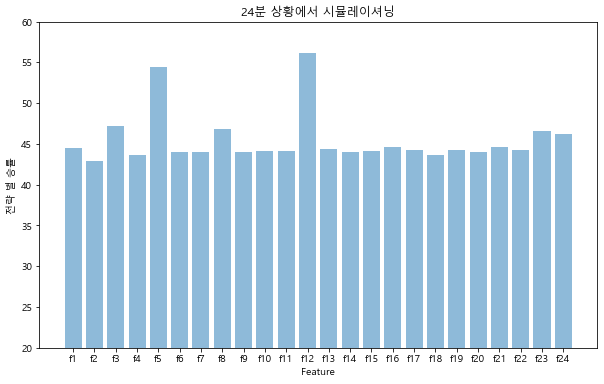

In [56]:
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
xticks_range = ["f{}".format(i) for i in range(1, 25)]
for idx, wr in enumerate(winrate_var):
    winrate_var[idx] = wr*100 + 10
fig = plt.figure()
fig.patch.set_facecolor("white")
fig.set_size_inches(10, 6)
plt.bar(xticks_range, winrate_var, alpha=0.5)
plt.ylim(20, 60)
plt.xlabel("Feature")
plt.ylabel("전략 별 승률")
plt.title("24분 상황에서 시뮬레이셔닝")
plt.show()

In [36]:
xlabels[winrate_var.index(max(winrate_var))]

'kills_inhibitors'

In [57]:
simul = np.array(df.append(latestState))
simul = scaler.fit_transform(simul)
timestamps, input_dim = simul.shape
simul = simul.reshape(1, timestamps, input_dim)
acc = eval("RNN25").predict(simul)[0][0]
acc

0.33994332